In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [6]:
PATH='C:/Users/User/.keras/datasets/cifar-10-batches-py/'
train_dir=os.path.join(PATH,'train')
val_dir=os.path.join(PATH,'validation')

In [7]:
train_dir

'C:/Users/User/.keras/datasets/cifar-10-batches-py/train'

In [8]:
val_dir

'C:/Users/User/.keras/datasets/cifar-10-batches-py/validation'

In [9]:
import pathlib

In [10]:
train_dir=pathlib.Path(train_dir)
val_dir=pathlib.Path(val_dir)

In [11]:
train_dir

WindowsPath('C:/Users/User/.keras/datasets/cifar-10-batches-py/train')

In [12]:
val_dir

WindowsPath('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation')

In [13]:
train_image_count=len(list(train_dir.glob('*/*.jpg')))
train_image_count

50000

In [14]:
val_image_count=len(list(val_dir.glob('*/*.jpg')))
val_image_count

10000

In [15]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*')])
CLASS_NAMES

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [16]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

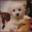

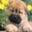

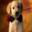

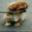

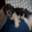

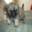

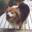

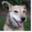

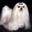

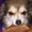

In [17]:
label_5=list(train_dir.glob('5/*'))

for image_path in label_5[:10]:
    display.display(Image.open(str(image_path)))

In [18]:
tf.__version__

'1.12.0'

In [64]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    #rotation_range=45,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #zoom_range=0.5
                    )
val_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    #rotation_range=45,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #zoom_range=0.5
                    )

In [65]:
BATCH_SIZE = 128
IMG_HEIGHT = 32
IMG_WIDTH = 32
STEPS_PER_EPOCH = np.ceil(train_image_count/BATCH_SIZE)

In [66]:
train_image_count

50000

In [67]:
STEPS_PER_EPOCH

391.0

In [70]:
train_data_generator = train_image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
val_data_generator = val_image_generator.flow_from_directory(directory=str(val_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [113]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

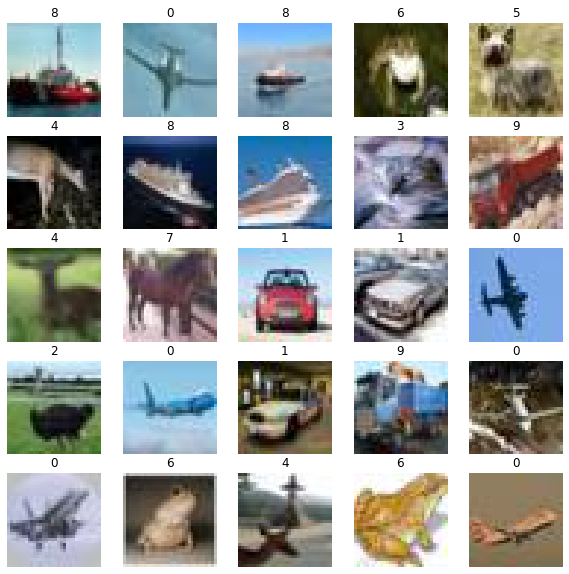

In [114]:
image_batch_train, label_batch_train = next(train_data_generator)
show_batch(image_batch_train, label_batch_train)

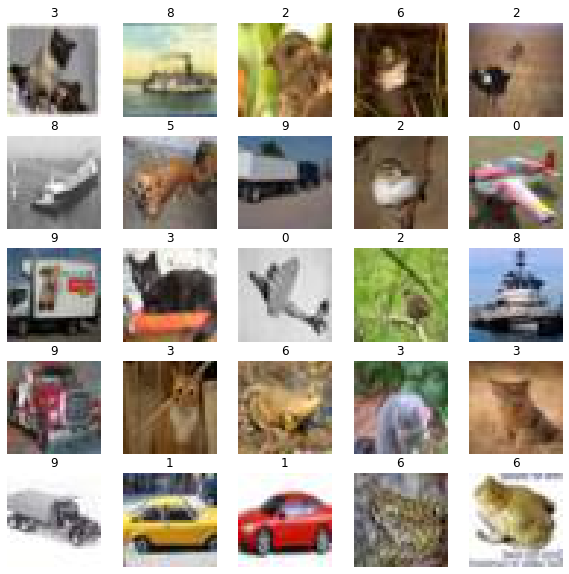

In [73]:
image_batch_val, label_batch_val = next(val_data_generator)
show_batch(image_batch_val, label_batch_val)

In [89]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Dropout(0.3),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    Dropout(rate=0.3),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    Dropout(0.3),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dropout(0.3),
    Dense(2500, activation='relu'),
    Dropout(0.3),
    Dense(1500, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [90]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [92]:
try:
    model.load_weights("SaveModel/cifar10CnnModel.h5")
    print("load model successful. Continue train model..")
except:
    print("load model failed. Start train a new model")
    

load model failed. Start train a new model


In [93]:
history = model.fit_generator(train_data_generator,
                    steps_per_epoch=2000, 
                    epochs=5,
                    validation_data=val_data_generator,
                    validation_steps=1000,
                    verbose=1
)

model.save_weights("SaveModel/cifar10CnnModel.h5")
print("Save model to disk")

Epoch 1/5
2000/2000 [==============================] - 1056s 528ms/step - loss: 1.2190 - acc: 0.5586 - val_loss: 0.8424 - val_acc: 0.7087
Epoch 2/5
2000/2000 [==============================] - 1157s 578ms/step - loss: 0.7799 - acc: 0.7247 - val_loss: 0.7069 - val_acc: 0.7574
Epoch 3/5
2000/2000 [==============================] - 1294s 647ms/step - loss: 0.6538 - acc: 0.7702 - val_loss: 0.6278 - val_acc: 0.7801
Epoch 4/5
2000/2000 [==============================] - 1217s 608ms/step - loss: 0.5835 - acc: 0.7948 - val_loss: 0.5935 - val_acc: 0.7954
Epoch 5/5
2000/2000 [==============================] - 1056s 528ms/step - loss: 0.5416 - acc: 0.8092 - val_loss: 0.6300 - val_acc: 0.7866
Save model to disk


In [94]:
try:
    model.load_weights("SaveModel/cifar10CnnModel.h5")
    print("load model successful. Continue train model..")
except:
    print("load model failed. Start train a new model")

history_part2 = model.fit_generator(train_data_generator,
                    steps_per_epoch=2000, 
                    epochs=5,
                    validation_data=val_data_generator,
                    validation_steps=1000,
                    verbose=1
)

model.save_weights("SaveModel/cifar10CnnModel.h5")
print("Save model to disk")

load model successful. Continue train model..
Epoch 1/5
2000/2000 [==============================] - 1161s 581ms/step - loss: 0.5093 - acc: 0.8203 - val_loss: 0.6044 - val_acc: 0.7972
Epoch 2/5
2000/2000 [==============================] - 1092s 546ms/step - loss: 0.4847 - acc: 0.8300 - val_loss: 0.5888 - val_acc: 0.7994
Epoch 3/5
2000/2000 [==============================] - 1115s 558ms/step - loss: 0.4714 - acc: 0.8338 - val_loss: 0.5911 - val_acc: 0.8006
Epoch 4/5
2000/2000 [==============================] - 1018s 509ms/step - loss: 0.4524 - acc: 0.8412 - val_loss: 0.5908 - val_acc: 0.7978
Epoch 5/5
2000/2000 [==============================] - 1179s 590ms/step - loss: 0.4443 - acc: 0.8449 - val_loss: 0.5604 - val_acc: 0.8129
Save model to disk


In [95]:
score=model.evaluate_generator(val_data_generator)

In [96]:
score

[0.5702890195846557, 0.804]

In [97]:
import numpy as np
import matplotlib.pyplot as plt
def show_model_history(model_history,train,val):
    plt.plot(model_history.history[train])
    plt.plot(model_history.history[val])
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend([train,val],loc='upper left')
    plt.show()

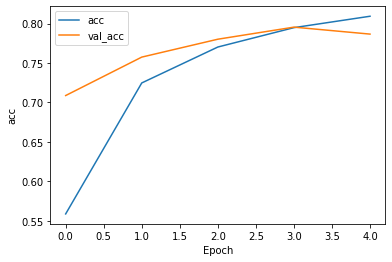

In [98]:
show_model_history(history,'acc','val_acc')

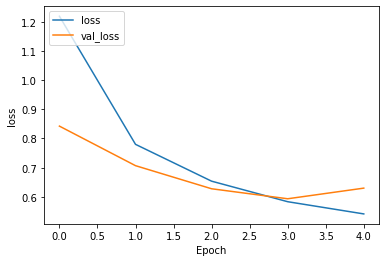

In [99]:
show_model_history(history,'loss','val_loss')

In [152]:
predict_probability=model.predict(val_data_generator)

In [141]:
predict= model.predict_classes(val_data_generator)

In [102]:
predict[:5]

array([6, 1, 4, 6, 9], dtype=int64)

In [153]:
predict2=model.predict_generator(val_data_generator)

In [163]:
predict2[:3]

array([[9.64491628e-05, 8.34718347e-04, 5.07089216e-03, 5.16854286e-01,
        2.40807291e-04, 3.67572099e-01, 1.05394736e-01, 1.33768760e-03,
        2.03802157e-03, 5.60334651e-04],
       [1.16287993e-08, 2.08020667e-12, 4.48360948e-09, 3.07672252e-08,
        2.89255481e-10, 4.12907664e-09, 3.05909703e-12, 3.26967516e-11,
        1.00000000e+00, 4.55944189e-08],
       [5.26865944e-03, 1.38430512e-02, 1.12641789e-01, 1.95667654e-01,
        1.20968521e-01, 2.52019882e-01, 9.88539904e-02, 1.86486498e-01,
        2.29138252e-03, 1.19585516e-02]], dtype=float32)

In [129]:
predict3=model.predict_proba(val_data_generator)

In [164]:
predict3[:3]

array([[9.43319220e-03, 1.61275379e-02, 2.73081958e-01, 1.10868365e-01,
        2.07084119e-01, 5.54377399e-02, 2.60300875e-01, 6.29297318e-03,
        5.90445027e-02, 2.32865382e-03],
       [3.76117020e-03, 7.66231179e-01, 2.19624999e-05, 2.38310327e-04,
        3.84662526e-05, 1.08098058e-04, 6.83071412e-05, 7.18552328e-05,
        1.63246319e-03, 2.27828220e-01],
       [3.02704539e-05, 2.96240114e-06, 3.38796503e-03, 1.22249834e-02,
        7.64558613e-01, 1.41925156e-01, 2.23326060e-04, 7.76384398e-02,
        2.55205487e-06, 5.69797066e-06]], dtype=float32)

In [145]:
predict[:10]

array([3, 8, 5, 4, 3, 2, 4, 1, 4, 6], dtype=int64)

In [146]:
label_dictionary={0:"airplan",1:"vehicle",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [296]:
image_batch_val, label_batch_val = next(val_data_generator)
predict_batch_class=model.predict_classes(image_batch_val)
predict_batch_probability=model.predict(image_batch_val)

def show_predict_probability(j):
    plt.figure(figsize=(1,1))
    plt.imshow(image_batch_val[j])
    #predict=np.array(predict2[j])
    #print("ground   truth:"+label_dictionary[CLASS_NAMES[label_batch_val[j]==1][0].title()])
    print("predict result:"+label_dictionary[predict_batch_class[j]])
    plt.show()
    for i in range(0,10):
        print(label_dictionary[i]+' probability: %1.9f'%(predict_batch_probability[j][i]))
    print()

predict result:ship


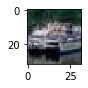

airplan probability: 0.026219863
vehicle probability: 0.013150574
bird probability: 0.000078556
cat probability: 0.000126451
deer probability: 0.000151689
dog probability: 0.000000566
frog probability: 0.000087676
horse probability: 0.000044287
ship probability: 0.950049222
truck probability: 0.010091149

predict result:deer


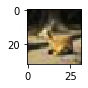

airplan probability: 0.063588038
vehicle probability: 0.002341026
bird probability: 0.090540849
cat probability: 0.036169041
deer probability: 0.528060555
dog probability: 0.004154910
frog probability: 0.259516060
horse probability: 0.012691324
ship probability: 0.001926411
truck probability: 0.001011801

predict result:horse


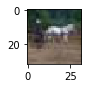

airplan probability: 0.242114797
vehicle probability: 0.011588993
bird probability: 0.063656017
cat probability: 0.009101542
deer probability: 0.283078969
dog probability: 0.021476768
frog probability: 0.005364502
horse probability: 0.313837945
ship probability: 0.021787323
truck probability: 0.027993139

predict result:deer


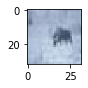

airplan probability: 0.198897302
vehicle probability: 0.002804370
bird probability: 0.155457184
cat probability: 0.098277964
deer probability: 0.339962810
dog probability: 0.059787821
frog probability: 0.012083388
horse probability: 0.062078454
ship probability: 0.066194728
truck probability: 0.004455998

predict result:truck


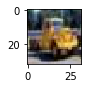

airplan probability: 0.000000000
vehicle probability: 0.000510035
bird probability: 0.000000000
cat probability: 0.000000000
deer probability: 0.000000000
dog probability: 0.000000000
frog probability: 0.000000001
horse probability: 0.000000000
ship probability: 0.000000038
truck probability: 0.999489903

predict result:truck


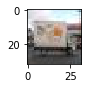

airplan probability: 0.006061637
vehicle probability: 0.000640126
bird probability: 0.000000046
cat probability: 0.000002271
deer probability: 0.000000051
dog probability: 0.000002708
frog probability: 0.000000112
horse probability: 0.000074528
ship probability: 0.001092687
truck probability: 0.992125750

predict result:truck


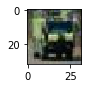

airplan probability: 0.000000830
vehicle probability: 0.029702537
bird probability: 0.000000927
cat probability: 0.000002444
deer probability: 0.000004185
dog probability: 0.000003613
frog probability: 0.000000787
horse probability: 0.000004233
ship probability: 0.000037318
truck probability: 0.970243156

predict result:ship


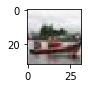

airplan probability: 0.000208388
vehicle probability: 0.000002144
bird probability: 0.000000055
cat probability: 0.000008568
deer probability: 0.000000354
dog probability: 0.000000087
frog probability: 0.000000327
horse probability: 0.000000023
ship probability: 0.999762237
truck probability: 0.000017895

predict result:airplan


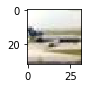

airplan probability: 0.982490480
vehicle probability: 0.000008119
bird probability: 0.001470008
cat probability: 0.000008523
deer probability: 0.000261503
dog probability: 0.000000844
frog probability: 0.000003181
horse probability: 0.000070930
ship probability: 0.015413695
truck probability: 0.000272703

predict result:truck


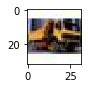

airplan probability: 0.000044064
vehicle probability: 0.002728639
bird probability: 0.000000020
cat probability: 0.000091913
deer probability: 0.000000065
dog probability: 0.000001559
frog probability: 0.000000073
horse probability: 0.000000252
ship probability: 0.000010989
truck probability: 0.997122347

predict result:deer


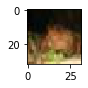

airplan probability: 0.001233710
vehicle probability: 0.000438813
bird probability: 0.036136463
cat probability: 0.182462826
deer probability: 0.596665502
dog probability: 0.079825841
frog probability: 0.055647712
horse probability: 0.046778888
ship probability: 0.000169177
truck probability: 0.000641125

predict result:truck


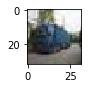

airplan probability: 0.000027418
vehicle probability: 0.082854994
bird probability: 0.000012537
cat probability: 0.000210343
deer probability: 0.000000244
dog probability: 0.000040474
frog probability: 0.000041627
horse probability: 0.000000689
ship probability: 0.000119782
truck probability: 0.916691899

predict result:horse


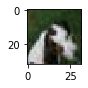

airplan probability: 0.000000004
vehicle probability: 0.000000000
bird probability: 0.000526358
cat probability: 0.001322442
deer probability: 0.000006055
dog probability: 0.014108187
frog probability: 0.000001707
horse probability: 0.984035194
ship probability: 0.000000003
truck probability: 0.000000001

predict result:cat


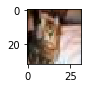

airplan probability: 0.000000256
vehicle probability: 0.000000008
bird probability: 0.000024447
cat probability: 0.900691926
deer probability: 0.000017081
dog probability: 0.098903067
frog probability: 0.000000920
horse probability: 0.000358434
ship probability: 0.000000055
truck probability: 0.000003720

predict result:ship


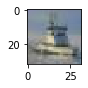

airplan probability: 0.000346345
vehicle probability: 0.000000541
bird probability: 0.000013589
cat probability: 0.000010484
deer probability: 0.000000887
dog probability: 0.000000428
frog probability: 0.000000108
horse probability: 0.000002864
ship probability: 0.999623418
truck probability: 0.000001283

predict result:horse


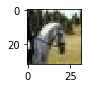

airplan probability: 0.000049273
vehicle probability: 0.000017664
bird probability: 0.000307251
cat probability: 0.000589381
deer probability: 0.001716293
dog probability: 0.007893968
frog probability: 0.000021617
horse probability: 0.989393592
ship probability: 0.000007212
truck probability: 0.000003752

predict result:ship


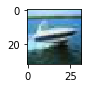

airplan probability: 0.038610931
vehicle probability: 0.000082059
bird probability: 0.006886933
cat probability: 0.000035915
deer probability: 0.000248587
dog probability: 0.000001409
frog probability: 0.000078200
horse probability: 0.000005836
ship probability: 0.954048753
truck probability: 0.000001370

predict result:ship


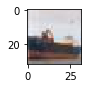

airplan probability: 0.009549609
vehicle probability: 0.000013914
bird probability: 0.000131199
cat probability: 0.000138475
deer probability: 0.001866999
dog probability: 0.000072993
frog probability: 0.000015629
horse probability: 0.000078711
ship probability: 0.986055851
truck probability: 0.002076643

predict result:truck


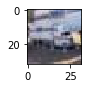

airplan probability: 0.134058684
vehicle probability: 0.184162170
bird probability: 0.000556139
cat probability: 0.001547473
deer probability: 0.000964789
dog probability: 0.000586312
frog probability: 0.000942201
horse probability: 0.001221378
ship probability: 0.115148485
truck probability: 0.560812294

predict result:horse


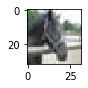

airplan probability: 0.043496735
vehicle probability: 0.000260251
bird probability: 0.003287178
cat probability: 0.099624023
deer probability: 0.168948770
dog probability: 0.039347164
frog probability: 0.005764393
horse probability: 0.608002782
ship probability: 0.000786463
truck probability: 0.030482251

predict result:horse


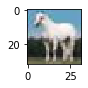

airplan probability: 0.000007036
vehicle probability: 0.000000608
bird probability: 0.000035703
cat probability: 0.000002926
deer probability: 0.000367108
dog probability: 0.000596223
frog probability: 0.000001571
horse probability: 0.998987019
ship probability: 0.000000001
truck probability: 0.000001768

predict result:horse


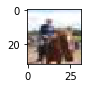

airplan probability: 0.003164953
vehicle probability: 0.000140285
bird probability: 0.000415357
cat probability: 0.000982192
deer probability: 0.005530166
dog probability: 0.001029347
frog probability: 0.000009390
horse probability: 0.634674907
ship probability: 0.000466216
truck probability: 0.353587180

predict result:bird


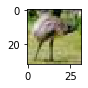

airplan probability: 0.000265436
vehicle probability: 0.000000070
bird probability: 0.995878220
cat probability: 0.000065638
deer probability: 0.002588819
dog probability: 0.000710753
frog probability: 0.000003922
horse probability: 0.000487189
ship probability: 0.000000023
truck probability: 0.000000016

predict result:ship


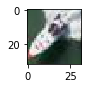

airplan probability: 0.229033396
vehicle probability: 0.233256862
bird probability: 0.026560511
cat probability: 0.028114822
deer probability: 0.026162932
dog probability: 0.009517106
frog probability: 0.023572737
horse probability: 0.031655803
ship probability: 0.371354312
truck probability: 0.020771604

predict result:frog


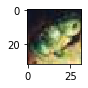

airplan probability: 0.000000020
vehicle probability: 0.000008174
bird probability: 0.001190123
cat probability: 0.001908649
deer probability: 0.000117474
dog probability: 0.000134072
frog probability: 0.996638417
horse probability: 0.000001964
ship probability: 0.000000320
truck probability: 0.000000707

predict result:horse


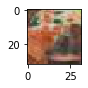

airplan probability: 0.000754115
vehicle probability: 0.002987579
bird probability: 0.024922887
cat probability: 0.075864218
deer probability: 0.021808978
dog probability: 0.030473799
frog probability: 0.004588838
horse probability: 0.826517284
ship probability: 0.001631682
truck probability: 0.010450678

predict result:ship


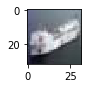

airplan probability: 0.000000177
vehicle probability: 0.000000000
bird probability: 0.000000000
cat probability: 0.000000000
deer probability: 0.000000000
dog probability: 0.000000000
frog probability: 0.000000000
horse probability: 0.000000000
ship probability: 0.999999881
truck probability: 0.000000000

predict result:cat


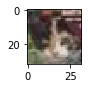

airplan probability: 0.000571949
vehicle probability: 0.000532721
bird probability: 0.037958894
cat probability: 0.602815986
deer probability: 0.099268131
dog probability: 0.208869979
frog probability: 0.023522990
horse probability: 0.025316931
ship probability: 0.000214381
truck probability: 0.000928032

predict result:ship


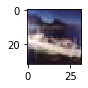

airplan probability: 0.091832995
vehicle probability: 0.000392059
bird probability: 0.000665146
cat probability: 0.001365745
deer probability: 0.004330210
dog probability: 0.000096429
frog probability: 0.000084731
horse probability: 0.000048208
ship probability: 0.900529683
truck probability: 0.000654700

predict result:cat


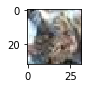

airplan probability: 0.001450753
vehicle probability: 0.002349753
bird probability: 0.115868777
cat probability: 0.387000024
deer probability: 0.109930523
dog probability: 0.121347226
frog probability: 0.234192386
horse probability: 0.015750773
ship probability: 0.011096764
truck probability: 0.001012895

predict result:cat


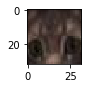

airplan probability: 0.001895346
vehicle probability: 0.000836910
bird probability: 0.032882206
cat probability: 0.477267772
deer probability: 0.047170777
dog probability: 0.260728687
frog probability: 0.157822028
horse probability: 0.015087393
ship probability: 0.000819098
truck probability: 0.005489882

predict result:vehicle


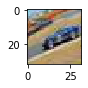

airplan probability: 0.314272732
vehicle probability: 0.627702773
bird probability: 0.012738998
cat probability: 0.001127134
deer probability: 0.000004613
dog probability: 0.000007987
frog probability: 0.000174288
horse probability: 0.000027770
ship probability: 0.031795990
truck probability: 0.012147621



In [297]:
for i in range(0,32):
    show_predict_probability(i)

In [107]:
image_batch_val, label_batch_val = next(val_data_generator)
predict3=model.predict_on_batch(image_batch_val)

In [108]:
predict3[0]

array([3.2787726e-03, 1.7943768e-05, 8.1892127e-01, 1.7248860e-02,
       1.4619020e-01, 2.6047535e-03, 1.1742447e-04, 9.2272758e-03,
       2.3763210e-03, 1.7228662e-05], dtype=float32)

In [304]:
def show_batch_predict(image_batch, label_batch):
  predict_batch_class=model.predict_classes(image_batch)
  plt.figure(figsize=(10,10))
  for n in range(25):
      #print(predict[n])
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title('predict:'+label_dictionary[predict_batch_class[n]]+' '+CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

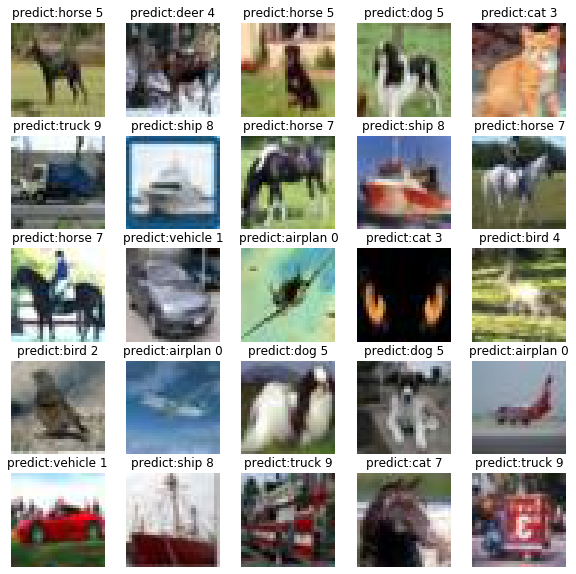

In [306]:
image_batch_val, label_batch_val = next(val_data_generator)
show_batch_predict(image_batch_val, label_batch_val)

In [216]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (32, 32, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/8/8_757.jpg')
predict_probability=model.predict(image)

In [302]:
predict_image_class=model.predict_classes(image)
def show_pic_predict_result(path,filename):
    image=load(path+filename+'.jpg')
    predict_probability=model.predict(image)
    predict_class=model.predict_classes(image)
    #plt.imshow(image)
    #plt.show()
    print("predict result:"+label_dictionary[predict_class[0]])
    for i in range(0,10):
        print(label_dictionary[i]+' probability: %1.9f'%(predict_probability[0][i]))

In [303]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/8/','8_1102')

predict result:ship
airplan probability: 0.000039939
vehicle probability: 0.000000007
bird probability: 0.000055913
cat probability: 0.000025527
deer probability: 0.000003283
dog probability: 0.000058543
frog probability: 0.000000205
horse probability: 0.000022548
ship probability: 0.999793351
truck probability: 0.000000717


In [240]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/6/','6_535')

predict result:frog
airplan probability: 0.000100413
vehicle probability: 0.000735802
bird probability: 0.124074243
cat probability: 0.128430605
deer probability: 0.072180815
dog probability: 0.026803683
frog probability: 0.645865321
horse probability: 0.001571598
ship probability: 0.000101632
truck probability: 0.000135867


In [241]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/3/','3_760')

predict result:dog
airplan probability: 0.009768842
vehicle probability: 0.000430377
bird probability: 0.005260069
cat probability: 0.311248451
deer probability: 0.042814087
dog probability: 0.368459076
frog probability: 0.000902698
horse probability: 0.236663878
ship probability: 0.001049239
truck probability: 0.023403285


In [242]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/3/','3_1180')

predict result:cat
airplan probability: 0.000749310
vehicle probability: 0.000870490
bird probability: 0.010404686
cat probability: 0.737607181
deer probability: 0.000336193
dog probability: 0.239175230
frog probability: 0.003162928
horse probability: 0.006030782
ship probability: 0.000889966
truck probability: 0.000773338


In [243]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/2/','2_706')

predict result:bird
airplan probability: 0.264751434
vehicle probability: 0.000095941
bird probability: 0.715079963
cat probability: 0.010154325
deer probability: 0.000442772
dog probability: 0.000250714
frog probability: 0.002955962
horse probability: 0.000354171
ship probability: 0.005846228
truck probability: 0.000068645


In [244]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/1/','1_3080')

predict result:vehicle
airplan probability: 0.314272463
vehicle probability: 0.627703130
bird probability: 0.012738964
cat probability: 0.001127131
deer probability: 0.000004613
dog probability: 0.000007987
frog probability: 0.000174288
horse probability: 0.000027770
ship probability: 0.031795945
truck probability: 0.012147645


In [245]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/1/','1_4799')

predict result:vehicle
airplan probability: 0.000000000
vehicle probability: 0.999998927
bird probability: 0.000000000
cat probability: 0.000000000
deer probability: 0.000000000
dog probability: 0.000000000
frog probability: 0.000000000
horse probability: 0.000000000
ship probability: 0.000000019
truck probability: 0.000001088


In [247]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/9/','9_2027')

predict result:truck
airplan probability: 0.000095426
vehicle probability: 0.001806406
bird probability: 0.000003718
cat probability: 0.004934323
deer probability: 0.000003024
dog probability: 0.001678950
frog probability: 0.001141471
horse probability: 0.000093326
ship probability: 0.001696298
truck probability: 0.988547087


In [248]:
show_pic_predict_result('C:/Users/User/.keras/datasets/cifar-10-batches-py/validation/9/','9_3086')

predict result:truck
airplan probability: 0.000000027
vehicle probability: 0.000029665
bird probability: 0.000000000
cat probability: 0.000000009
deer probability: 0.000000000
dog probability: 0.000000022
frog probability: 0.000000001
horse probability: 0.000000001
ship probability: 0.000000003
truck probability: 0.999970317
